<a href="https://colab.research.google.com/github/obafemi007/Ai-bootcamp/blob/main/AIclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip list


Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
absolufy-imports                      0.3.1
accelerate                            1.10.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.12.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
alembic                               1.16.5
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.10.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  25.1.0
array_record                          0.8.1
arrow 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay


In [2]:
import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTy9y-ZgfGjLUqVjgF4spf3Z9Z4WysnzZsS2yZQgoS1DuZ1WDDbxDDOdpLbiH8SFL5-8XmWe88e3cxu/pub?output=csv'

df = pd.read_csv(url)

df.head(10)



,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
5,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836,Kecimen
6,42492,310.146072,176.131449,0.823099,43904,0.665894,823.796,Kecimen
7,60952,332.455472,235.429835,0.706058,62329,0.743598,933.366,Kecimen
8,42256,323.189607,172.575926,0.845499,44743,0.698031,849.728,Kecimen
9,64380,366.964842,227.771615,0.784056,66125,0.664376,981.544,Kecimen


In [ ]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [ ]:
df['Class']

,Class
0,Kecimen
1,Kecimen
2,Kecimen
3,Kecimen
4,Kecimen
...,...
895,Besni
896,Besni
897,Besni
898,Besni


In [13]:
raisin_classes =df['Class'].unique()
print(raisin_classes)

[0 1]


In [4]:
classes = {unique_class: idx for idx, unique_class in enumerate(df["Class"].unique())}
print(classes)



{'Kecimen': 0, 'Besni': 1}


TO

In [5]:
df['Class'] = df['Class'].map(classes)

In [ ]:



df.head(10)
print(classes)


{'Kecimen': 0, 'Besni': 1}


In [6]:
train_dataset, test_dataset = train_test_split(df, test_size=0.2)
x_train=train_dataset.drop('Class',axis=1)
y_train=train_dataset['Class']
x_test=test_dataset.drop('Class',axis=1)
y_test=test_dataset['Class']

In [7]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy:',accuracy)

accuracy: 0.85


In [11]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[73 12]
 [15 80]]


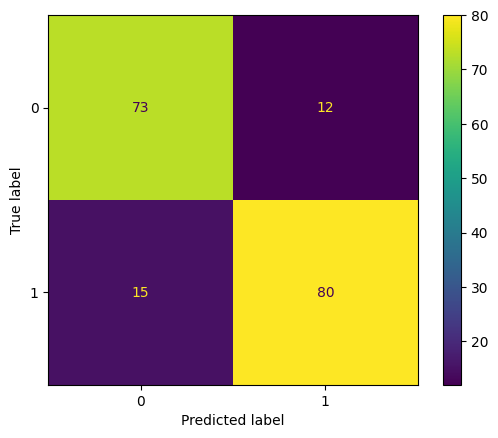

In [14]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=raisin_classes)
cm_display.plot()

In [16]:
cv=KFold(n_splits=10,random_state=1,shuffle=True)
scores=cross_val_score(model,x_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print('cross_validations:',scores)

cross_validations: [0.79166667 0.83333333 0.875      0.86111111 0.88888889 0.90277778
 0.93055556 0.79166667 0.90277778 0.88888889]
